In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

# Redes

In [2]:
class Pais:
  def __init__(self, numero_ciudades, costos):
    """
    Debemos pasar una matriz de adyacencia que represente los costos.
    """
    self.numero_ciudades = numero_ciudades
    self.ciudades = {}
    self.costos = costos
    for i in range(numero_ciudades):
      self.ciudades[i] = []

    for i in range(numero_ciudades):
      for j in range(i + 1, numero_ciudades):
        if costos[i][j] != 0:
          self.ciudades[i].append(j)
          self.ciudades[j].append(i)

In [3]:
def existe_camino(ciudades, ciudad_origen, ciudad_destino):
  """
  Comprueba si existe un camino entre dos ciudades en la red.

  Args:
    ciudades: El diccionario que representa la red.
    ciudad_origen: La ciudad de origen.
    ciudad_destino: La ciudad de destino.

  Returns:
    True si existe un camino entre las dos ciudades, False en caso contrario.
  """

  visitados = set()
  cola = [ciudad_origen]

  while cola:
    ciudad_actual = cola.pop(0)
    visitados.add(ciudad_actual)

    if ciudad_actual == ciudad_destino:
      return True

    for vecino in ciudades[ciudad_actual]:
      if vecino not in visitados:
        cola.append(vecino)

  return False

In [4]:
def dibuja(red):
  """
  Dibuja la red representada por la instancia de "Red".

  Args:
    red: Una instancia de "Red".
  """

  G = nx.Graph()
  for i in range(red.numero_ciudades):
    G.add_node(i)
  for i in range(red.numero_ciudades):
    for j in red.ciudades[i]:
      G.add_edge(i, j, weight=red.costos[i][j])

  pos = nx.spring_layout(G)
  nx.draw(G, pos, with_labels=True)
  nx.draw_networkx_edge_labels(G, pos, font_size=8)
  plt.show()

# Generar grafica inicial

In [5]:
numero_ciudades = 5
costos = [
    [0, 10, 15, 20, 25],
    [10, 0, 35, 25, 30],
    [15, 35, 0, 30, 20],
    [20, 25, 30, 0, 10],
    [25, 30, 20, 10, 0]
]

pais = Pais(numero_ciudades, costos)

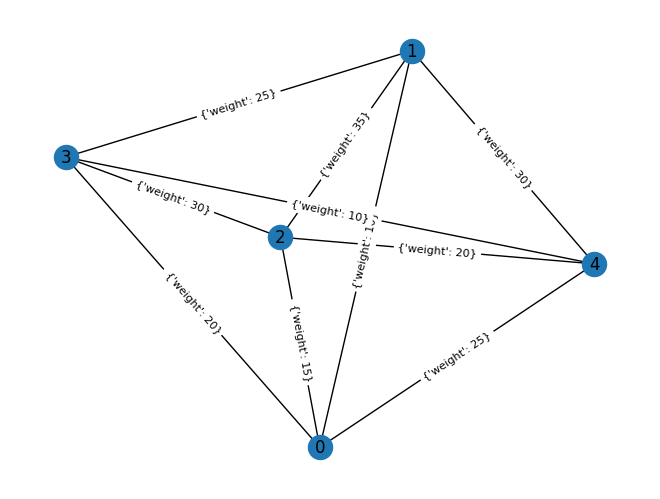

In [6]:
dibuja(pais)

# Algoritmo Genético

### Prueba para generar una lista de cromosomas iniciales

In [7]:
def generate_random_chromosomes(num_nodes, adjacency_matrix, num_chromosomes):
    chromosomes = []
    for _ in range(num_chromosomes):
        nodes = list(range(num_nodes))
        random.shuffle(nodes)
        chromosome = nodes[:]  # Copiar la lista de nodos aleatoriamente ordenados
        chromosome.append(chromosome[0])  # Agregar el nodo inicial al final para cerrar el ciclo

        valid_chromosome = False
        while not valid_chromosome:
            valid_chromosome = True
            for i in range(num_nodes):
                if adjacency_matrix[chromosome[i]][chromosome[i + 1]] == 0:
                    random.shuffle(chromosome)
                    chromosome.append(chromosome[0])
                    valid_chromosome = False
                    break

        chromosomes.append(chromosome[:-1])  # Eliminar el nodo inicial duplicado al final

    return chromosomes

# Ejemplo de uso:
num_nodes = 5
adjacency_matrix = [
[0, 10, 15, 20, 25],
[10, 0, 35, 25, 30],
[15, 35, 0, 30, 20],
[20, 25, 30, 0, 10],
[25, 30, 20, 10, 0]
]

num_chromosomes = 8 #Siempre debe de ser un número par (contando Kruskal) para que el cruce de cromosomas sea posible

initial_chromosomes = generate_random_chromosomes(num_nodes, adjacency_matrix, num_chromosomes)
print("Cromosomas iniciales generados:")
print(initial_chromosomes)


Cromosomas iniciales generados:
[[0, 4, 2, 1, 3], [2, 1, 3, 0, 4], [1, 0, 3, 4, 2], [1, 3, 2, 4, 0], [1, 4, 2, 0, 3], [2, 4, 1, 0, 3], [3, 2, 0, 1, 4], [4, 1, 0, 2, 3]]


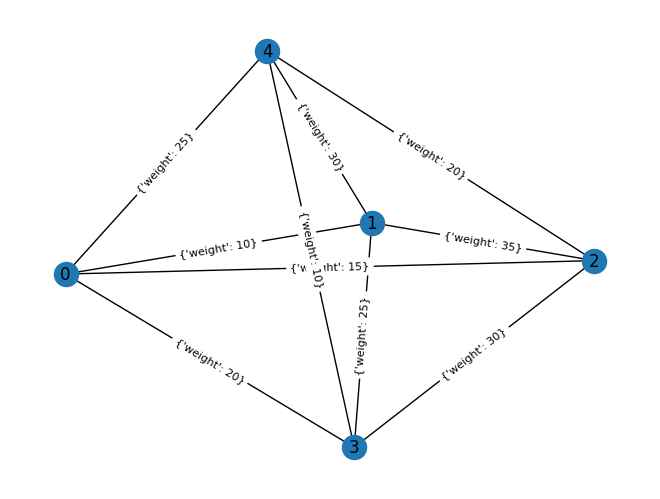

In [8]:
dibuja(pais)

 ### Kruskal’s Minimum Spanning Tree (MST)

In [9]:
class KruskalMST:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []

    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])

    def find_parent(self, parent, i):
        if parent[i] == i:
            return i
        return self.find_parent(parent, parent[i])

    def union(self, parent, rank, x, y):
        x_root = self.find_parent(parent, x)
        y_root = self.find_parent(parent, y)

        if rank[x_root] < rank[y_root]:
            parent[x_root] = y_root
        elif rank[x_root] > rank[y_root]:
            parent[y_root] = x_root
        else:
            parent[y_root] = x_root
            rank[x_root] += 1

    def is_cycle(self):
        parent = [-1] * self.V

        for u, v, _ in self.graph:
            x = self.find_parent(parent, u)
            y = self.find_parent(parent, v)

            if x == y:
                return True

            self.union(parent, x, y)

        return False

    def find_eulerian_cycle(self):
        adjacency_matrix = [[0] * self.V for _ in range(self.V)]
        for u, v, w in self.graph:
            adjacency_matrix[u][v] = w
            adjacency_matrix[v][u] = w

        cycle = []
        stack = [0]

        while stack:
            u = stack[-1]
            found = False

            for v, weight in enumerate(adjacency_matrix[u]):
                if weight > 0:
                    stack.append(v)
                    adjacency_matrix[u][v] = 0
                    adjacency_matrix[v][u] = 0
                    found = True
                    break

            if not found:
                cycle.append(stack.pop())

        return cycle

    def find_eulerian_path(self):
        graph = [[] for _ in range(self.V)]
        for u, v, w in self.graph:
            graph[u].append((v, w))
            graph[v].append((u, w))

        eulerian_path = []

        def dfs(node):
            nonlocal eulerian_path
            while graph[node]:
                neighbor, weight = graph[node].pop()
                for i, (n, _) in enumerate(graph[neighbor]):
                    if n == node:
                        graph[neighbor].pop(i)
                        break
                dfs(neighbor)
            eulerian_path.append(node)

        dfs(0)  # Comenzar desde el nodo 0
        return eulerian_path[::-1]

    def kruskal_or_cycle_tsp(self):
        if self.is_cycle():
            eulerian_path = self.find_eulerian_path()
            tsp_solution = list(dict.fromkeys(eulerian_path))  # Eliminar nodos repetidos
            return tsp_solution
        else:
            result = []
            i = 0
            e = 0

            self.graph = sorted(self.graph, key=lambda item: item[2])

            parent = [i for i in range(self.V)]
            rank = [0] * self.V

            while e < self.V - 1:
                u, v, w = self.graph[i]
                i += 1
                x = self.find_parent(parent, u)
                y = self.find_parent(parent, v)

                if x != y:
                    e += 1
                    result.append([u, v, w])
                    self.union(parent, rank, x, y)

            tsp_solution = []
            for u, v, w in result:
                tsp_solution.append(u)
                tsp_solution.append(v)

            tsp_solution.append(result[0][0])  # Agregar el primer nodo al final para cerrar el ciclo

            return tsp_solution

# Ejemplo de uso:
num_nodes = 5
adjacency_matrix = [
    [0, 10, 15, 20, 25],
    [10, 0, 35, 25, 30],
    [15, 35, 0, 30, 20],
    [20, 25, 30, 0, 10],
    [25, 30, 20, 10, 0]
]

kruskal = KruskalMST(num_nodes)
for i in range(num_nodes):
    for j in range(num_nodes):
        if adjacency_matrix[i][j] != 0:
            kruskal.add_edge(i, j, adjacency_matrix[i][j])

tsp_initial_solution = kruskal.kruskal_or_cycle_tsp()
print("Solución inicial para TSP:")
print(tsp_initial_solution)

Solución inicial para TSP:
[0, 4, 3, 2, 1]


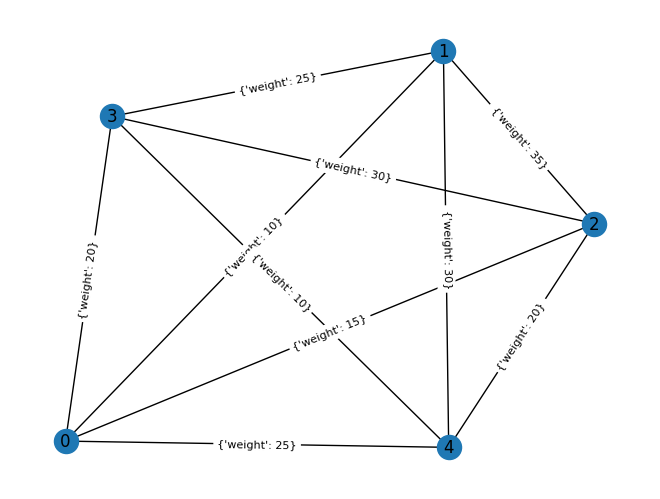

In [10]:
dibuja(pais)

### Mutar lista de cromosomas

In [11]:
def generar_mutaciones(cromosomas, tasa_mutacion):
    cromosomas_mutados = []
    for cromosoma in cromosomas:
        cromosoma_mutado = cromosoma[:]  # Copia el cromosoma original para evitar mutar el original
        for indice_1 in range(len(cromosoma_mutado)):
            if random.random() < tasa_mutacion:
                indice_2 = random.randint(0, len(cromosoma_mutado) - 1)
                cromosoma_mutado[indice_1], cromosoma_mutado[indice_2] = cromosoma_mutado[indice_2], cromosoma_mutado[indice_1]
        cromosomas_mutados.append(cromosoma_mutado)
    return cromosomas_mutados

tasa_mutacion = 0.3  # Tasa de mutación del 30%

cromosomas_mutados = generar_mutaciones(initial_chromosomes, tasa_mutacion) #se esta utilizando la lista de cromosomas iniciales definida arriba
print("Cromosomas iniciales:", initial_chromosomes)
print("Cromosomas mutados:", cromosomas_mutados)

Cromosomas iniciales: [[0, 4, 2, 1, 3], [2, 1, 3, 0, 4], [1, 0, 3, 4, 2], [1, 3, 2, 4, 0], [1, 4, 2, 0, 3], [2, 4, 1, 0, 3], [3, 2, 0, 1, 4], [4, 1, 0, 2, 3]]
Cromosomas mutados: [[1, 3, 4, 2, 0], [2, 1, 3, 4, 0], [0, 1, 3, 4, 2], [4, 3, 2, 1, 0], [1, 4, 2, 0, 3], [2, 4, 1, 0, 3], [3, 4, 0, 2, 1], [1, 3, 0, 2, 4]]


### Cruzar cromosomas

In [12]:
def crossover(chromosome1, chromosome2):
    # Seleccionar un punto de cruce aleatorio
    crossover_point = random.randint(0, len(chromosome1) - 1)

    # Realizar el cruce en el punto seleccionado
    new_chromosome1 = [-1] * len(chromosome1)
    new_chromosome2 = [-1] * len(chromosome2)

    # Copiar la sección antes del punto de cruce sin cambios
    for i in range(crossover_point):
        new_chromosome1[i] = chromosome1[i]
        new_chromosome2[i] = chromosome2[i]

    # Completar los cromosomas con las ciudades restantes sin repeticiones
    unused_cities1 = [city for city in chromosome2 if city not in new_chromosome1]
    unused_cities2 = [city for city in chromosome1 if city not in new_chromosome2]

    idx = crossover_point
    for city in chromosome2:
        if city not in new_chromosome1:
            new_chromosome1[idx] = city
            idx = (idx + 1) % len(chromosome2)

    idx = crossover_point
    for city in chromosome1:
        if city not in new_chromosome2:
            new_chromosome2[idx] = city
            idx = (idx + 1) % len(chromosome1)

    return new_chromosome1, new_chromosome2

def cross_over_general(lista_cromosomas):
  lista_1 = lista_cromosomas[:len(lista_cromosomas)//2]
  lista_2 = lista_cromosomas[len(lista_cromosomas)//2:]

  nuevos_cromosomas = []

  for i in range(len(lista_1)):
    new_chromosome1, new_chromosome2 = crossover(lista_1[i], lista_2[i])
    nuevos_cromosomas.append(new_chromosome1)
    nuevos_cromosomas.append(new_chromosome2)

  return nuevos_cromosomas

print("Viejos cromosomas: ",initial_chromosomes)
print("Nuevos cromosomas: ",cross_over_general(initial_chromosomes))

Viejos cromosomas:  [[0, 4, 2, 1, 3], [2, 1, 3, 0, 4], [1, 0, 3, 4, 2], [1, 3, 2, 4, 0], [1, 4, 2, 0, 3], [2, 4, 1, 0, 3], [3, 2, 0, 1, 4], [4, 1, 0, 2, 3]]
Nuevos cromosomas:  [[0, 4, 1, 2, 3], [1, 4, 0, 2, 3], [2, 1, 3, 0, 4], [2, 4, 1, 0, 3], [1, 0, 3, 2, 4], [3, 2, 1, 0, 4], [1, 3, 2, 4, 0], [4, 1, 0, 3, 2]]


# Fitness del cromosoma

In [56]:
def suma_pesos_nodos(lista_nodos, matriz_pesos):
    suma_pesos = 0
    lista_nodos = lista_nodos.copy()
    lista_nodos.append(lista_nodos[0])
    for i in range(len(lista_nodos) - 1):
        nodo_actual = lista_nodos[i]
        siguiente_nodo = lista_nodos[i + 1]

        # Verifica si hay una conexión entre los nodos en la matriz de pesos
        if nodo_actual < len(matriz_pesos) and siguiente_nodo < len(matriz_pesos[nodo_actual]):
            peso_arista = matriz_pesos[nodo_actual][siguiente_nodo]
            suma_pesos += peso_arista
        # Si el grafo es no dirigido, puedes añadir una comprobación para la conexión en ambas direcciones

    return suma_pesos

# Ejemplo de uso:
matriz_de_pesos = [
    [0, 10, 15, 20, 25],
    [10, 0, 35, 25, 30],
    [15, 35, 0, 30, 20],
    [20, 25, 30, 0, 10],
    [25, 30, 20, 10, 0]
]

nodos_a_calcular = [2, 3, 1, 0, 4]
resultado = suma_pesos_nodos(nodos_a_calcular, matriz_de_pesos)
print(f"La suma de los pesos de los nodos {nodos_a_calcular} es: {resultado}")

La suma de los pesos de los nodos [2, 3, 1, 0, 4] es: 110


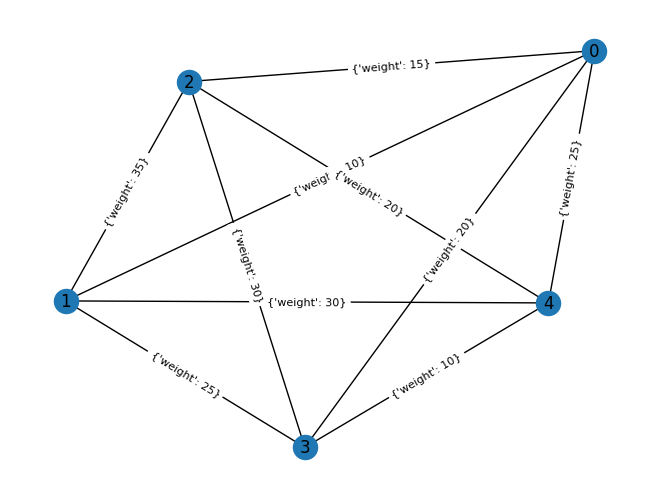

In [14]:
dibuja(pais)

# Ahora si el codigo shingon

In [15]:
A = [1,2,3,4,5,6]
B = A[:len(A)//2][:-2]
C = A[len(A)//2:]

print(B)
print(C)

[1]
[4, 5, 6]


In [84]:
def genetico_FPS(costos, n_cromosomas_iniciales, proba_mutacion, max_it):
  #parametros iniciales

  nodos = len(costos) #numero de nodos
  cromosomas_inciales = generate_random_chromosomes(nodos, costos, n_cromosomas_iniciales)

  # Solucion de Kruskal
  kruskal = KruskalMST(nodos)
  for i in range(nodos):
      for j in range(nodos):
          if costos[i][j] != 0:
              kruskal.add_edge(i, j, costos[i][j])

  tsp_initial_solution = kruskal.kruskal_or_cycle_tsp()
  cromosomas_inciales.append(tsp_initial_solution) #añadimos la solucion de Kruskal a los cromosomas iniciales

  #Iniciamos el algoritmo

  num_generaciones = max_it
  umbral_convergencia = 10  # Umbral de convergencia
  num_generaciones_convergencia = 10  # Número de generaciones para convergencia

  convergencia_count = 0  # Contador para verificar la convergencia
  best_fitness = float('inf')  # Mejor aptitud inicial
  poblacion = cromosomas_inciales.copy() #poblacion inicial

  for generacion in range(num_generaciones):
      # Evaluación de la aptitud de la población
      fitness_values = [suma_pesos_nodos(individuo, costos) for individuo in poblacion]

      # Encontrar el mejor individuo de la generación actual
      best_current_fitness = min(fitness_values)

      # Verificar la mejora en la aptitud
      if best_current_fitness < best_fitness - umbral_convergencia:
          best_fitness = best_current_fitness
          convergencia_count = 0
      else:
          convergencia_count += 1

      # Comprobar si se ha alcanzado la convergencia durante las últimas generaciones
      if convergencia_count >= num_generaciones_convergencia:
          print(f"Convergencia alcanzada en la generación {generacion}")
          break

      #Dividir la poblacion para mutar y hacer cross_over ESTO PUEDE CAMBIAR SI QUEREMOS
      poblacion_cross_over = poblacion[:len(poblacion)//2][:-5] #quitamos 5
      poblacion_mutacion = poblacion[len(poblacion)//2:][:-5] #quitamos 5
      poblacion_random = generate_random_chromosomes(nodos, costos, 10) #añadimos 10 random

      #Cross over
      poblacion_cross_over_nueva = cross_over_general(poblacion_cross_over)

      #Mutacion
      poblacion_mutacion_nueva = generar_mutaciones(poblacion_mutacion, proba_mutacion)

      #Obtener mejores 100 de nueva generacion
      nueva_generacion = poblacion.copy()
      for k in poblacion_cross_over_nueva:
        nueva_generacion.append(k)
      for k in poblacion_mutacion_nueva:
        nueva_generacion.append(k)
      for k in poblacion_random:
        nueva_generacion.append(k)

      #Asignar fitness a nueva poblacion y quedarnos con mejores 50
      poblacion.clear() #vaciamos la poblacion actual
      dict_fitness_nueva_generacion = {}
      for cromosoma in range(len(nueva_generacion)):
        dict_fitness_nueva_generacion[cromosoma] = suma_pesos_nodos(nueva_generacion[cromosoma], costos)

      dict_fitness_nueva_generacion = sorted(dict_fitness_nueva_generacion.items(), key=lambda x:x[1], reverse=True)
      for j in dict_fitness_nueva_generacion[:-51]:
        poblacion.append(nueva_generacion[j[0]])

      poblacion.append(tsp_initial_solution) #añadimos la solucion de kruskal por si se borro

      generacion += 1 #aumentamos la generacion

  print("sale del loop")

  #Calculamos el mejor de la poblacion
  dict_poblacion = {}
  for cromosoma in range(len(poblacion)):
    dict_poblacion[cromosoma] = suma_pesos_nodos(poblacion[cromosoma], costos)

  dict_poblacion = sorted(dict_poblacion.items(), key=lambda x:x[1], reverse=True)
  camino = poblacion[dict_poblacion[0][0]]
  peso = dict_poblacion[0][1]
  return camino, peso

In [86]:
matriz = [
    [0, 10, 15, 20, 25],
    [10, 0, 35, 25, 30],
    [15, 35, 0, 30, 20],
    [20, 25, 30, 0, 10],
    [25, 30, 20, 10, 0]
]

camino, peso = genetico_FPS(matriz, n_cromosomas_iniciales = 49, proba_mutacion=0.5, max_it=100)
print("Camino: ",camino)
print("Peso: ",peso)

Convergencia alcanzada en la generación 10
sale del loop
Camino:  [1, 4, 0, 3, 2]
Peso:  140


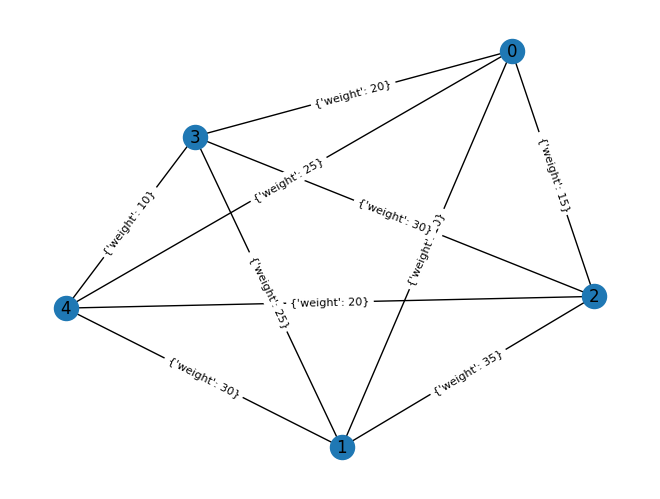

In [20]:
dibuja(pais)